In [1]:
import numpy as np
import pandas as pd

from libs.ml_analysis import SklearnModel
from libs.ml_analysis import ParetoScaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Calibri'

In [2]:
df = pd.read_excel('./data/ml_dataset.xlsx', sheet_name='children_ml_dataset')

X = df.drop(['Name', 'HDL', 'Label'], axis=1).values
y = df.HDL

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True, stratify=y)

In [3]:
print(X_train.shape)
print(X_test.shape)

(74, 47)
(33, 47)


In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sklearnmodel = SklearnModel(figsize=(7, 3.5), is_save_fig=True, dpi=600)

sklearnmodel.fit(X_train_scaled, y_train)
results = sklearnmodel.evaluation(X_test_scaled, y_test)

results

,model_name,accuracy,precision,f1,recall
0,LogistisRegression,0.939394,0.894737,0.944444,1.000000
1,SVM,0.939394,0.894737,0.944444,1.000000
2,DecisionTree,0.939394,0.894737,0.944444,1.000000
3,RandomForest,0.969697,0.947368,0.972973,1.000000
4,NaiveBayes,0.939394,0.947368,0.947368,0.947368
5,KNN,0.909091,0.842105,0.914286,1.000000


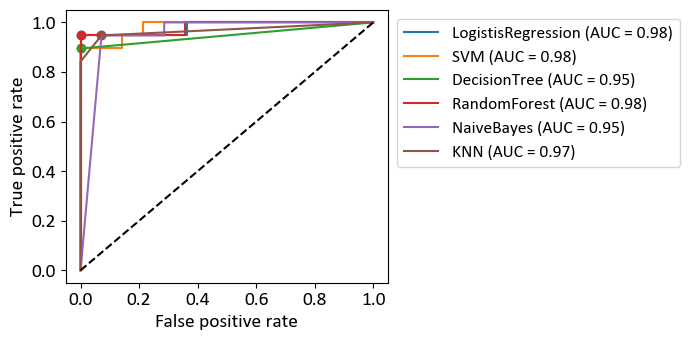

In [5]:
sklearnmodel.roc_curve(X_test_scaled, y_test)

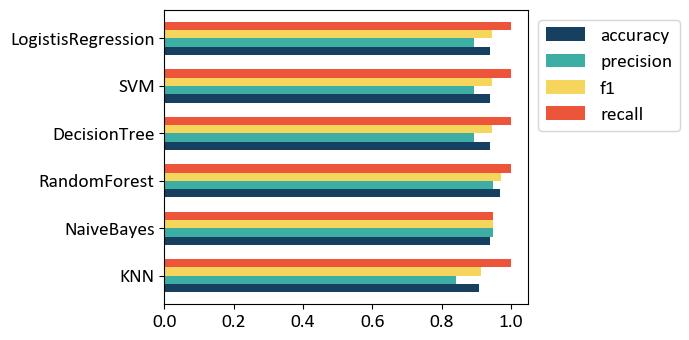

In [6]:
df_model = results.set_index('model_name')
df_model = df_model.reindex(['KNN', 'NaiveBayes', 'RandomForest', 'DecisionTree', 'SVM', 'LogistisRegression'])
ax = df_model.plot.barh(color=['#173f5f', '#3caea3', '#f6d55c', '#ed553b'], width=0.7, figsize=(7, 3.5))


plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('')
plt.tight_layout()
# plt.savefig('evaluation.png', dpi=600)

plt.show()